In [1]:
# General libraries
import pandas as pd
import numpy as np

# sklearn libraries for preprocessing and feature selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectPercentile, f_classif, SelectKBest
from sklearn import preprocessing

# sklearn libraries for model building and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Information

In [2]:
dataset_train = pd.read_csv("KDDTrain+.txt")
dataset_test = pd.read_csv("KDDTest+.txt")

In [3]:
dataset_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
dataset_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [5]:
# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack_type","difficulty_level"]

dataset_train = pd.read_csv("KDDTrain+.txt", header=None, names = col_names)
dataset_test = pd.read_csv("KDDTest+.txt", header=None, names = col_names)

# Remove 'difficulty_level' column from both training and test sets
dataset_train = dataset_train.drop('difficulty_level', axis=1)
dataset_test = dataset_test.drop('difficulty_level', axis=1)


# shape, this gives the dimensions of the dataset
print('Dimensions of the Training set:', dataset_train.shape)
print('Dimensions of the Test set:', dataset_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [6]:
# Shows the first 5 rows of the training dataset
dataset_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
# Shows the first 5 rows of the test dataset
dataset_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [8]:
# Label Distribution of both the Training and Test set
print('Label distribution Training set:')
print(dataset_train['attack_type'].value_counts())
print()
print('Label distribution Test set:')
print(dataset_test['attack_type'].value_counts())


Label distribution Training set:
attack_type
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Label distribution Test set:
attack_type
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293


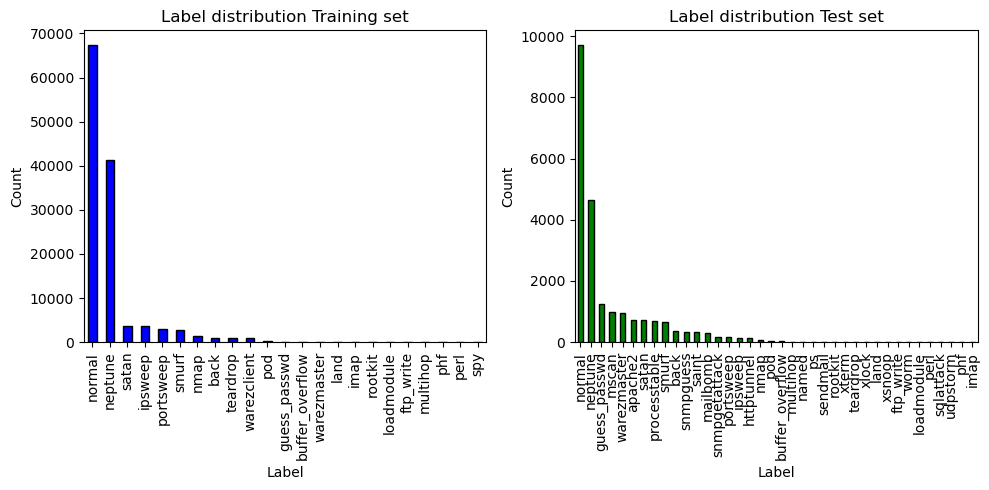

In [9]:
# Get label counts for training set
train_label_counts = dataset_train['attack_type'].value_counts()

# Get label counts for test set
test_label_counts = dataset_test['attack_type'].value_counts()

# Create a new figure
plt.figure(figsize=(10, 5))

# Create a bar plot for training set label distribution
plt.subplot(1, 2, 1)  # 1 row, 2 cols, subplot 1
train_label_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Label distribution Training set')
plt.xlabel('Label')
plt.ylabel('Count')

# Create a bar plot for test set label distribution
plt.subplot(1, 2, 2)  # 1 row, 2 cols, subplot 2
test_label_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Label distribution Test set')
plt.xlabel('Label')
plt.ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

## Data preprocessing:

In [10]:
# Check for missing values in dataset_train
print("Missing values in dataset_train:")
print(dataset_train.isnull().any())

Missing values in dataset_train:
duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerro

In [11]:
# Check for missing values in dataset_test
print("\nMissing values in dataset_test:")
print(dataset_test.isnull().any())


Missing values in dataset_test:
duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerro

In [12]:
# Identify categorical features and explore their unique categories in the training set
print('Training set:')
for col_name in dataset_train.columns:
    if dataset_train[col_name].dtypes == 'object':
        unique_cat = len(dataset_train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

# Check the distribution of categories in the 'service' feature
print()
print('Distribution of categories in service:')
print(dataset_train['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'attack_type' has 23 categories

Distribution of categories in service:
service
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: count, dtype: int64


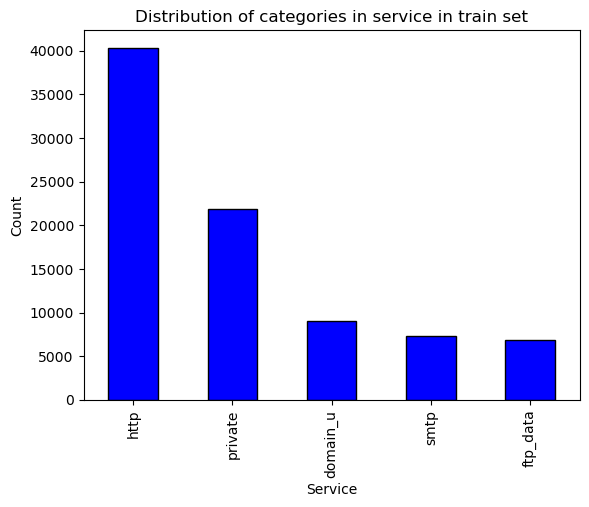

In [13]:
# Get the counts of the top categories in the 'service' column
service_counts = dataset_train['service'].value_counts().sort_values(ascending=False).head()

# Create a bar plot of the counts
service_counts.plot(kind='bar', color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of categories in service in train set')

# Display the plot
plt.show()

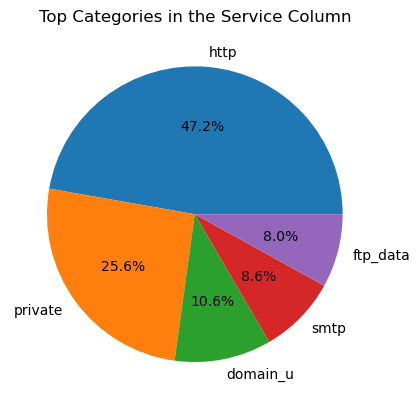

In [14]:
# Get the value counts of the 'service' column
service_counts = dataset_train['service'].value_counts()

# Get the top 5 categories
top_categories = service_counts.head(5)

# Create a pie chart
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%')

# Add a title
plt.title('Top Categories in the Service Column')

# Display the pie chart
plt.show()

In [15]:
# Test set
print('Test set:')
for col_name in dataset_test.columns:
    if dataset_test[col_name].dtypes == 'object' :
        unique_cat = len(dataset_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))


# Check the distribution of categories in the 'service' feature
print()
print('Distribution of categories in service:')
print(dataset_test['service'].value_counts().sort_values(ascending=False).head())

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'attack_type' has 38 categories

Distribution of categories in service:
service
http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: count, dtype: int64


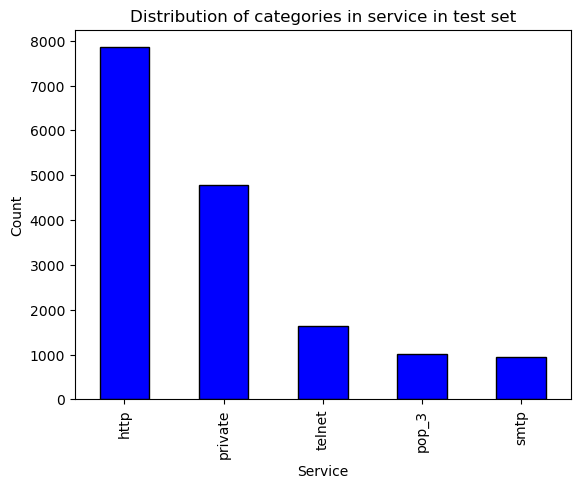

In [16]:
# Get the counts of the top categories in the 'service' column
service_counts = dataset_test['service'].value_counts().sort_values(ascending=False).head()

# Create a bar plot of the counts
service_counts.plot(kind='bar', color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of categories in service in test set')

# Display the plot
plt.show()

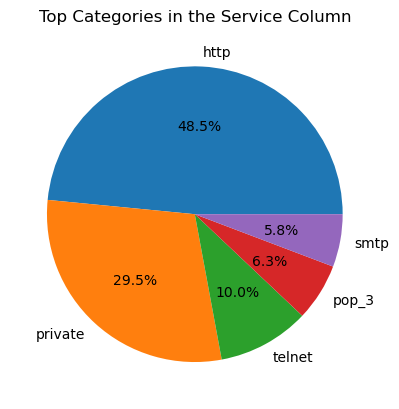

In [17]:
# Get the counts of the top categories in the 'service' column
service_counts = dataset_test['service'].value_counts().head()

# Create a pie chart
plt.pie(service_counts, labels=service_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Top Categories in the Service Column')

# Display the pie chart
plt.show()

In [18]:
# Concatenate the test and train datasets
combined_data = pd.concat([dataset_test, dataset_train])

# Print the unique values of the 'attack_type' column
print(set(list(combined_data['attack_type'])))

{'ipsweep', 'mailbomb', 'rootkit', 'udpstorm', 'neptune', 'httptunnel', 'ftp_write', 'normal', 'perl', 'teardrop', 'snmpguess', 'guess_passwd', 'ps', 'snmpgetattack', 'nmap', 'sqlattack', 'xlock', 'saint', 'smurf', 'back', 'sendmail', 'portsweep', 'warezmaster', 'named', 'buffer_overflow', 'phf', 'satan', 'land', 'spy', 'xterm', 'warezclient', 'imap', 'xsnoop', 'processtable', 'apache2', 'pod', 'multihop', 'worm', 'mscan', 'loadmodule'}


## Feature Encoding

In [19]:
# Code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag'] 
 # Get the categorical values into a 2D numpy array
dataset_train_categorical_values = dataset_train[categorical_columns]
dataset_test_categorical_values = dataset_test[categorical_columns]

In [20]:
dataset_train_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


## Make column names for dummies

In [21]:
# Get unique values of protocol type in the training set
unique_protocol = sorted(dataset_train.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2 = [string1 + x for x in unique_protocol]

# Get unique values of service in the training set
unique_service = sorted(dataset_train.service.unique())
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service]

# Get unique values of flag in the training set
unique_flag = sorted(dataset_train.flag.unique())
string3 = 'flag_'
unique_flag2 = [string3 + x for x in unique_flag]

# Combine the unique values of protocol type, service, and flag
dumcols = unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)
print(len(dumcols))

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [22]:
#do same for test set
unique_service_test=sorted(dataset_test.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2
print(testdumcols)
print(len(testdumcols))

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh', 'service_sunrpc'

In [23]:
# Transform categorical features into numbers using LabelEncoder() for train set
dataset_train_categorical_values_enc=dataset_train_categorical_values.apply(LabelEncoder().fit_transform)
print(dataset_train_categorical_values_enc.head())

print()

# Transform categorical features into numbers using LabelEncoder() for test set
dataset_test_categorical_values_enc=dataset_test_categorical_values.apply(LabelEncoder().fit_transform)
print(dataset_test_categorical_values_enc.head())

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9

   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


## One Hot Encode

In [24]:
categorical_columns = ['protocol_type', 'service', 'flag']

# Initialise OneHotEncoder
enc = OneHotEncoder(handle_unknown='error')

# Fit the encoder on the training data and transform it
dataset_train_categorical_values_fit_enc = enc.fit_transform(dataset_train[categorical_columns])

# Convert the encoded values to a dataframe and assign column names
dataset_train_categorical_data = pd.DataFrame(dataset_train_categorical_values_fit_enc.toarray(), columns=enc.get_feature_names_out(categorical_columns))

# Transform the test data using the same encoder
dataset_test_categorical_values_fit_enc = enc.transform(dataset_test[categorical_columns])

# Convert the encoded values to a dataframe
# Ensure the test set columns match the training set
dataset_test_categorical_data = pd.DataFrame(dataset_test_categorical_values_fit_enc.toarray(), columns=dataset_train_categorical_data.columns)

# Drop original categorical columns from the datasets
dataset_train = dataset_train.drop(categorical_columns, axis=1)
dataset_test = dataset_test.drop(categorical_columns, axis=1)

# Concatenate the new one-hot encoded columns with the original datasets
dataset_train_final = pd.concat([dataset_train, dataset_train_categorical_data], axis=1)
dataset_test_final = pd.concat([dataset_test, dataset_test_categorical_data], axis=1)


In [25]:
# Print the shape of the new dataframe to check the number of rows and columns
print(dataset_train_final.shape)

# Print the shape of the new test dataframe to check the number of rows and columns
print(dataset_test_final.shape)

(125973, 123)
(22544, 123)


In [26]:
dataset_train_final.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
dataset_test_final.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split Dataset into 4 datasets for every attack category

In [28]:
def categorise_attacks(df):
    # Mapping of attacks to categories
    attack_mapping = {
        'normal': 0,
        'neptune': 1, 'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,
        'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
        'ipsweep': 2, 'nmap': 2, 'portsweep': 2, 'satan': 2, 'mscan': 2, 'saint': 2,
        'ftp_write': 3, 'guess_passwd': 3, 'imap': 3, 'multihop': 3, 'phf': 3, 'spy': 3,
        'warezclient': 3, 'warezmaster': 3, 'sendmail': 3, 'named': 3, 'snmpgetattack': 3,
        'snmpguess': 3, 'xlock': 3, 'xsnoop': 3, 'httptunnel': 3,
        'buffer_overflow': 4, 'loadmodule': 4, 'perl': 4, 'rootkit': 4, 'ps': 4,
        'sqlattack': 4, 'xterm': 4
    }

    # Replace the 'attacktype' column based on the mapping
    df['attack_type'] = df['attack_type'].map(attack_mapping)

# Apply the function to both datasets
categorise_attacks(dataset_train_final)
categorise_attacks(dataset_test_final)

In [29]:
# Function to segment the dataset
def segment_dataset(dataset, attack_types):
    segmented_data = {}
    for attack_type in attack_types:
        segmented_data[attack_type] = dataset[dataset['attack_type'].isin(attack_types[attack_type])]
    return segmented_data

# Define the attack types and their corresponding labels
attack_types = {
    'DoS': [0, 1],
    'Probe': [0, 2],
    'R2L': [0, 3],
    'U2R': [0, 4]
}

# Segment the training dataset
train_segments = segment_dataset(dataset_train_final, attack_types)
dataset_train_DoS = train_segments['DoS']
dataset_train_Probe = train_segments['Probe']
dataset_train_R2L = train_segments['R2L']
dataset_train_U2R = train_segments['U2R']

# Segment the testing dataset
test_segments = segment_dataset(dataset_test_final, attack_types)
dataset_test_DoS = test_segments['DoS']
dataset_test_Probe = test_segments['Probe']
dataset_test_R2L = test_segments['R2L']
dataset_test_U2R = test_segments['U2R']

# Print the dimensions of the new datasets
print('Train Set Dimensions:')
print(f'DoS: {dataset_train_DoS.shape}')
print(f'Probe: {dataset_train_Probe.shape}')
print(f'R2L: {dataset_train_R2L.shape}')
print(f'U2R: {dataset_train_U2R.shape}')

print('\nTest Set Dimensions:')
print(f'DoS: {dataset_test_DoS.shape}')
print(f'Probe: {dataset_test_Probe.shape}')
print(f'R2L: {dataset_test_R2L.shape}')
print(f'U2R: {dataset_test_U2R.shape}')

Train Set Dimensions:
DoS: (113270, 123)
Probe: (78999, 123)
R2L: (68338, 123)
U2R: (67395, 123)

Test Set Dimensions:
DoS: (17171, 123)
Probe: (12132, 123)
R2L: (12596, 123)
U2R: (9778, 123)


## Feature Scaling

In [30]:
# Split dataframes into X & Y
# assign X as a dataframe of features and Y as a series of outcome variables
X_DoS = dataset_train_DoS.drop('attack_type',axis=1)
Y_DoS = dataset_train_DoS.attack_type
X_Probe = dataset_train_Probe.drop('attack_type',axis=1)
Y_Probe = dataset_train_Probe.attack_type
X_R2L = dataset_train_R2L.drop('attack_type',axis=1)
Y_R2L = dataset_train_R2L.attack_type
X_U2R = dataset_train_U2R.drop('attack_type',axis=1)
Y_U2R = dataset_train_U2R.attack_type

# Test Set
X_DoS_test = dataset_test_DoS.drop('attack_type',axis=1)
Y_DoS_test = dataset_test_DoS.attack_type
X_Probe_test = dataset_test_Probe.drop('attack_type',axis=1)
Y_Probe_test = dataset_test_Probe.attack_type
X_R2L_test = dataset_test_R2L.drop('attack_type',axis=1)
Y_R2L_test = dataset_test_R2L.attack_type
X_U2R_test = dataset_test_U2R.drop('attack_type',axis=1)
Y_U2R_test = dataset_test_U2R.attack_type

In [31]:
scaler = StandardScaler()

X_DoS = scaler.fit_transform(X_DoS)
X_DoS_test = scaler.fit_transform(X_DoS_test)

X_Probe = scaler.fit_transform(X_Probe)
X_Probe_test = scaler.fit_transform(X_Probe_test)

X_R2L = scaler.fit_transform(X_R2L)
X_R2L_test = scaler.fit_transform(X_R2L_test)

X_U2R = scaler.fit_transform(X_U2R)
X_U2R_test = scaler.fit_transform(X_U2R_test)

### Check that the Standard Deviation is 1 for X data frames

In [32]:
print(np.std(X_DoS, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1.]


In [33]:
X_DoS.shape

(113270, 122)

In [34]:
print(np.std(X_DoS_test, axis=0))

[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0.]


In [35]:
X_DoS_test.shape

(17171, 122)

In [36]:
print(np.std(X_Probe, axis=0))

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [37]:
X_Probe.shape

(78999, 122)

In [38]:
print(np.std(X_Probe_test, axis=0))

[1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [39]:
X_Probe_test.shape

(12132, 122)

In [40]:
print(np.std(X_R2L, axis=0))

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1.]


In [41]:
X_R2L.shape

(68338, 122)

In [42]:
print(np.std(X_R2L_test, axis=0))

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0.]


In [43]:
X_R2L_test.shape

(12596, 122)

In [44]:
print(np.std(X_U2R, axis=0))

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1.]


In [45]:
X_U2R.shape

(67395, 122)

In [46]:
print(np.std(X_U2R_test, axis=0))

[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0.]


In [47]:
X_U2R_test.shape

(9778, 122)

## Feature Selection

In [48]:
# Ignore divide by zero and invalid value warnings
np.seterr(divide='ignore', invalid='ignore')

# Create a selector object using SelectPercentile with f_classif scoring function
# Select the top 10% of features based on their ANOVA F-value
selector = SelectPercentile(f_classif, percentile=10)

X_newDoS = selector.fit_transform(X_DoS, Y_DoS)
X_newDoS_test = selector.transform(X_DoS_test)

X_newProbe = selector.fit_transform(X_Probe,Y_Probe)
X_newProbe_test = selector.transform(X_Probe_test)

X_newR2L = selector.fit_transform(X_R2L,Y_R2L)
X_newR2L_test = selector.transform(X_R2L_test)

X_newU2R = selector.fit_transform(X_U2R,Y_U2R)
X_newU2R_test = selector.transform(X_U2R_test)

/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 16  44  63  66  68  86 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 4 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  4  16  43  44  46  47  48  49  50  51  54  57  58  62  63  64  66  67
  68  70  71  72  73  74  76  77  78  79  80  81  82  83  86  87  89  92
  93  96  98  99 100 107 108 109 110 114] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/kaialogen/anaconda3/envs/Test-Mac/l

# Decision tree code

In [49]:
# Decison Tree Classifier
# Time taken to run: 1min 40s 

# Create decision tree classifiers for each attack type
clf_DoS = DecisionTreeClassifier(random_state=0)
clf_DoS_features = DecisionTreeClassifier(random_state=0)
clf_Probe = DecisionTreeClassifier(random_state=0)
clf_Probe_features = DecisionTreeClassifier(random_state=0)
clf_R2L = DecisionTreeClassifier(random_state=0)
clf_R2L_features = DecisionTreeClassifier(random_state=0)
clf_U2R = DecisionTreeClassifier(random_state=0)
clf_U2R_features = DecisionTreeClassifier(random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

stratified_k_fold = StratifiedKFold(n_splits=5)

# Perform grid search cross-validation to find the best hyperparameters for each classifier
grid_search_DoS = GridSearchCV(clf_DoS, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_DoS_features = GridSearchCV(clf_DoS_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe = GridSearchCV(clf_Probe, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe_features = GridSearchCV(clf_Probe_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L = GridSearchCV(clf_R2L, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L_features = GridSearchCV(clf_R2L_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R = GridSearchCV(clf_U2R, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R_features = GridSearchCV(clf_U2R_features, param_grid, cv=stratified_k_fold, n_jobs=-1)

# Fit the classifiers on the training data
grid_search_DoS.fit(X_DoS, Y_DoS.astype(int))
grid_search_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
grid_search_Probe.fit(X_Probe, Y_Probe.astype(int))
grid_search_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
grid_search_R2L.fit(X_R2L, Y_R2L.astype(int))
grid_search_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
grid_search_U2R.fit(X_U2R, Y_U2R.astype(int))
grid_search_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

# Print the best parameters
print("Best parameters for DoS classifier:", grid_search_DoS.best_params_)
print("Best parameters for DoS classifier with features:", grid_search_DoS_features.best_params_)
print("Best parameters for Probe classifier:", grid_search_Probe.best_params_)
print("Best parameters for Probe classifier with features:", grid_search_Probe_features.best_params_)
print("Best parameters for R2L classifier:", grid_search_R2L.best_params_)
print("Best parameters for R2L classifier with features:", grid_search_R2L_features.best_params_)
print("Best parameters for U2R classifier:", grid_search_U2R.best_params_)
print("Best parameters for U2R classifier with features:", grid_search_U2R_features.best_params_)

best_clf_DoS = grid_search_DoS.best_estimator_
best_clf_DoS_features = grid_search_DoS_features.best_estimator_
best_clf_Probe = grid_search_Probe.best_estimator_
best_clf_Probe_features = grid_search_Probe_features.best_estimator_
best_clf_R2L = grid_search_R2L.best_estimator_
best_clf_R2L_features = grid_search_R2L_features.best_estimator_
best_clf_U2R = grid_search_U2R.best_estimator_
best_clf_U2R_features = grid_search_U2R_features.best_estimator_

Best parameters for DoS classifier: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for DoS classifier with features: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best parameters for Probe classifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for Probe classifier with features: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for R2L classifier: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for R2L classifier with features: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best parameters for U2R classifier: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best parameters for U2R classifier with features: {'criterion': 'entropy', 'max_de

## Decision tree evaluation

### DoS Evaluation

Confusion Matrix for DoS:
[[9507  204]
 [2660 4800]]
Accuracy: 0.8332071515928018


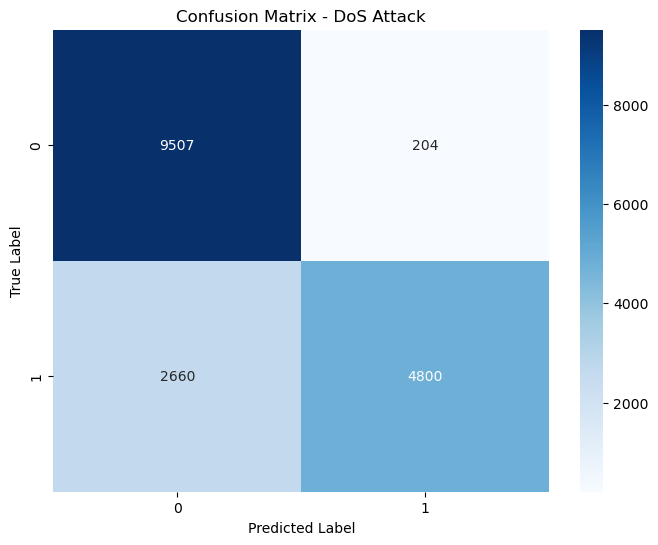

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      9711
           1       0.96      0.64      0.77      7460

    accuracy                           0.83     17171
   macro avg       0.87      0.81      0.82     17171
weighted avg       0.86      0.83      0.83     17171

AUC-ROC Score for DoS Prediction: 0.8112778811678969


In [50]:
Y_DoS_pred=best_clf_DoS.predict(X_DoS_test)
# Create confusion matrix
cm_DoS = confusion_matrix(Y_DoS_test, Y_DoS_pred)
print("Confusion Matrix for DoS:")
print(cm_DoS)
accuracy_DoS = accuracy_score(Y_DoS_test, Y_DoS_pred)
print("Accuracy:", accuracy_DoS)

# Visualise the confusion matrix for clf_DoS
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_pred))

# Calculate the predicted probabilities for the positive class (DoS attack)
Y_DoS_pred_proba = best_clf_DoS.predict_proba(X_DoS_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_DoS_test, Y_DoS_pred_proba)
print("AUC-ROC Score for DoS Prediction:", auc_roc_score)

### DoS Evaluation with feature selection

Confusion Matrix for DoS with feature selection:
[[8577 1134]
 [1955 5505]]
Accuracy: 0.8201036631529905


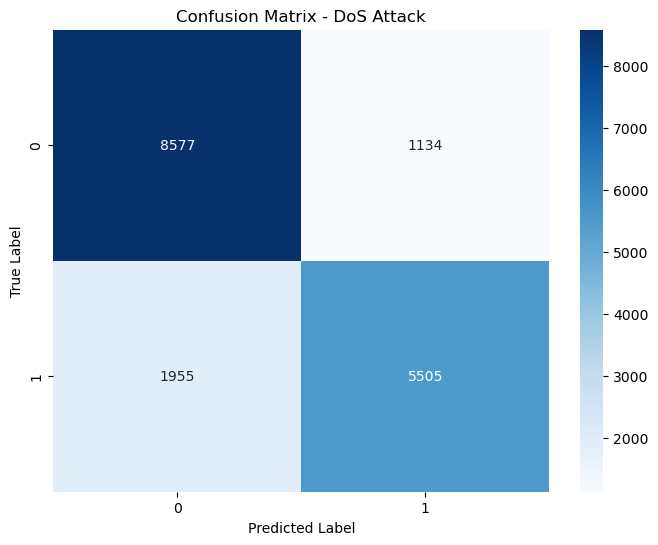

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      9711
           1       0.83      0.74      0.78      7460

    accuracy                           0.82     17171
   macro avg       0.82      0.81      0.81     17171
weighted avg       0.82      0.82      0.82     17171

AUC-ROC Score for DoS Prediction: 0.8116815305492265


In [51]:
# Make predictions on the test set
Y_DoS_pred = best_clf_DoS_features.predict(X_newDoS_test)

# Create confusion matrix
cm_DoS = confusion_matrix(Y_DoS_test, Y_DoS_pred)
print("Confusion Matrix for DoS with feature selection:")
print(cm_DoS)

# Calculate accuracy
accuracy_DoS = accuracy_score(Y_DoS_test, Y_DoS_pred)
print("Accuracy:", accuracy_DoS)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_pred))

# Calculate the predicted probabilities for the positive class (DoS attack)
# Ensure to use the transformed test set
Y_DoS_pred_proba = best_clf_DoS_features.predict_proba(X_newDoS_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_DoS_test, Y_DoS_pred_proba)
print("AUC-ROC Score for DoS Prediction:", auc_roc_score)

### Probe prediction

Confusion Matrix for Probe:
[[8654 1057]
 [ 372 2049]]
Accuracy: 0.8822123310253874


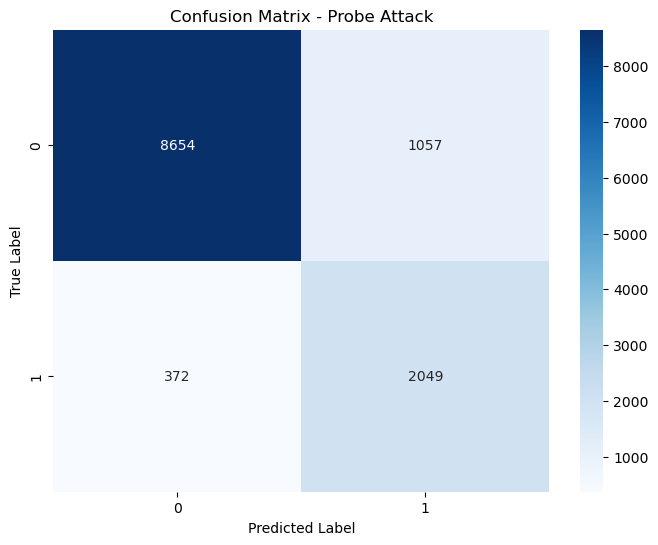

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      9711
           2       0.66      0.85      0.74      2421

    accuracy                           0.88     12132
   macro avg       0.81      0.87      0.83     12132
weighted avg       0.90      0.88      0.89     12132

AUC-ROC Score for Probe Prediction: 0.8687494233917846


In [52]:
Y_Probe_pred=best_clf_Probe.predict(X_Probe_test)
# Create confusion matrix
cm_Probe = confusion_matrix(Y_Probe_test, Y_Probe_pred)
print("Confusion Matrix for Probe:")
print(cm_Probe)
accuracy_Probe = accuracy_score(Y_Probe_test, Y_Probe_pred)
print("Accuracy:", accuracy_Probe)

# Visualise the confusion matrix for clf_Probe
plt.figure(figsize=(8, 6))
sns.heatmap(cm_Probe, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Probe Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

# Calculate the predicted probabilities for the positive class (Probe attack)
Y_Probe_pred_proba = best_clf_Probe.predict_proba(X_Probe_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_Probe_test, Y_Probe_pred_proba)
print("AUC-ROC Score for Probe Prediction:", auc_roc_score)

### Probe prediction with feature selection

Confusion Matrix for Probe with features:
[[9442  269]
 [ 740 1681]]
Accuracy: 0.916831519947247


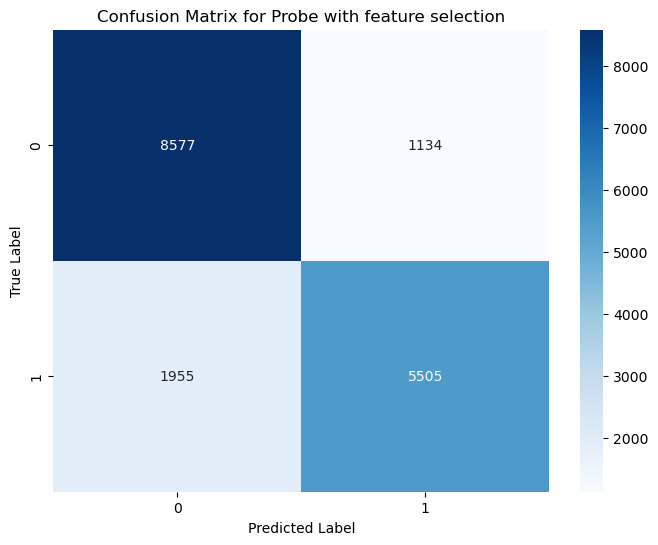

Classification Report for Probe with feature selection:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9711
           2       0.86      0.69      0.77      2421

    accuracy                           0.92     12132
   macro avg       0.89      0.83      0.86     12132
weighted avg       0.91      0.92      0.91     12132

AUC-ROC Score for Probe with feature selection: 0.8341060361931953


In [53]:
# Make predictions on the test set
Y_Probe_pred = best_clf_Probe_features.predict(X_newProbe_test)

# Create confusion matrix
cm_Probe = confusion_matrix(Y_Probe_test, Y_Probe_pred)
print("Confusion Matrix for Probe with features:")
print(cm_Probe)

# Calculate accuracy
accuracy_Probe = accuracy_score(Y_Probe_test, Y_Probe_pred)
print("Accuracy:", accuracy_Probe)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Probe with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for Probe with feature selection:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

# Calculate the predicted probabilities for the positive class (Probe attack)
# Ensure to use the transformed test set
Y_Probe_pred_proba = best_clf_Probe_features.predict_proba(X_newProbe_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_Probe_test, Y_Probe_pred_proba)
print("AUC-ROC Score for Probe with feature selection:", auc_roc_score)

### R2L prediction

Confusion Matrix for R2L:
[[9697   14]
 [2570  315]]
Accuracy: 0.7948555096856145


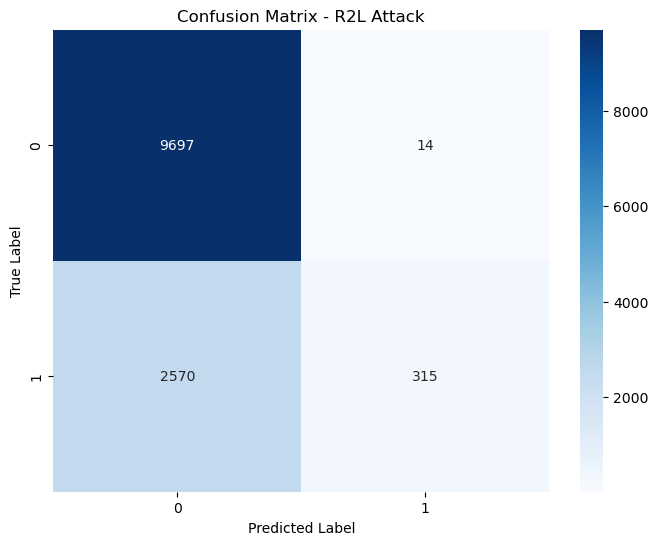

Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9711
           3       0.96      0.11      0.20      2885

    accuracy                           0.79     12596
   macro avg       0.87      0.55      0.54     12596
weighted avg       0.83      0.79      0.73     12596

AUC-ROC Score for DoS Prediction: 0.553871888924404


In [54]:
Y_R2L_pred=best_clf_R2L.predict(X_R2L_test)
# Create confusion matrix
cm_R2L = confusion_matrix(Y_R2L_test, Y_R2L_pred)
print("Confusion Matrix for R2L:")
print(cm_R2L)
accuracy_R2L = accuracy_score(Y_R2L_test, Y_R2L_pred)
print("Accuracy:", accuracy_R2L)

# Visualise the confusion matrix for clf_R2L
plt.figure(figsize=(8, 6))
sns.heatmap(cm_R2L, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

# Calculate the predicted probabilities for the positive class (R2L attack)
Y_R2L_pred_proba = best_clf_R2L.predict_proba(X_R2L_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_R2L_test, Y_R2L_pred_proba)
print("AUC-ROC Score for DoS Prediction:", auc_roc_score)

### R2L prediction with feature selection

Confusion Matrix for R2L:
[[9709    2]
 [2787   98]]
Accuracy: 0.7785805017465862


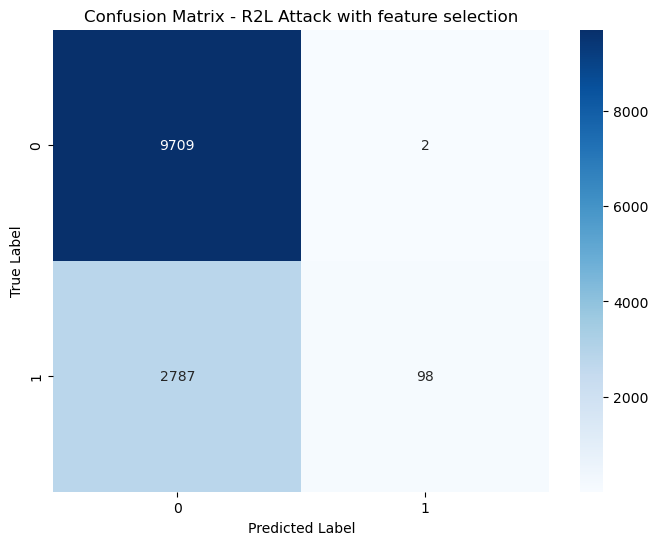

Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      9711
           3       0.98      0.03      0.07      2885

    accuracy                           0.78     12596
   macro avg       0.88      0.52      0.47     12596
weighted avg       0.82      0.78      0.69     12596

AUC-ROC Score for R2L Prediction: 0.5168814260731323


In [55]:
# Make predictions on the test set
Y_R2L_pred = best_clf_R2L_features.predict(X_newR2L_test)

# Create confusion matrix
cm_R2L = confusion_matrix(Y_R2L_test, Y_R2L_pred)
print("Confusion Matrix for R2L:")
print(cm_R2L)

# Calculate accuracy
accuracy_R2L = accuracy_score(Y_R2L_test, Y_R2L_pred)
print("Accuracy:", accuracy_R2L)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_R2L, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

# Calculate the predicted probabilities for the positive class (R2L attack)
# Ensure to use the transformed test set
Y_R2L_pred_proba = best_clf_R2L_features.predict_proba(X_newR2L_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_R2L_test, Y_R2L_pred_proba)
print("AUC-ROC Score for R2L Prediction:", auc_roc_score)

### U2R prediction

Confusion Matrix for U2R:
[[9707    4]
 [  53   14]]
Accuracy: 0.9941705870321129


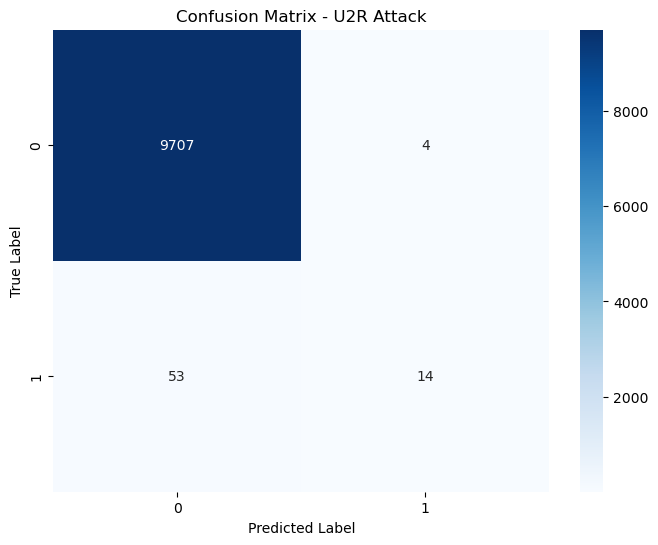

Classification Report for U2R:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.78      0.21      0.33        67

    accuracy                           0.99      9778
   macro avg       0.89      0.60      0.66      9778
weighted avg       0.99      0.99      0.99      9778

AUC-ROC Score for U2R Prediction: 0.3983565336739226


In [56]:
Y_U2R_pred=best_clf_U2R.predict(X_U2R_test)
# Create confusion matrix
cm_U2R = confusion_matrix(Y_U2R_test, Y_U2R_pred)
print("Confusion Matrix for U2R:")
print(cm_U2R)
accuracy_U2R = accuracy_score(Y_U2R_test, Y_U2R_pred)
print("Accuracy:", accuracy_U2R)

# Visualise the confusion matrix for clf_U2R
plt.figure(figsize=(8, 6))
sns.heatmap(cm_U2R, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_pred))

# Calculate the predicted probabilities for the positive class (U2R attack)
Y_U2R_pred_proba = best_clf_U2R.predict_proba(X_U2R_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_U2R_test, Y_U2R_pred_proba)
print("AUC-ROC Score for U2R Prediction:", auc_roc_score)

### U2R prediction with feature selection

Confusion Matrix for U2R:
[[9707    4]
 [  41   26]]
Accuracy: 0.9953978318674576


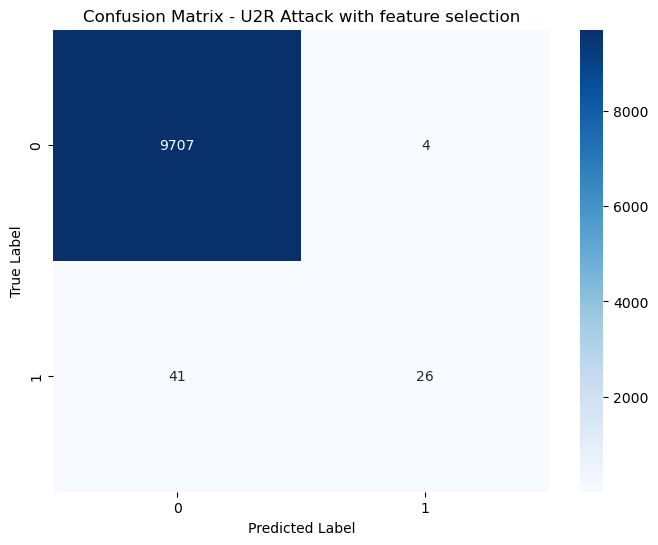

Classification Report for U2R:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           4       0.87      0.39      0.54        67

    accuracy                           1.00      9778
   macro avg       0.93      0.69      0.77      9778
weighted avg       0.99      1.00      0.99      9778

AUC-ROC Score for U2R Prediction: 0.7081852092641518


In [57]:
# Make predictions on the test set
Y_U2R_pred = best_clf_U2R_features.predict(X_newU2R_test)

# Create confusion matrix
cm_U2R = confusion_matrix(Y_U2R_test, Y_U2R_pred)
print("Confusion Matrix for U2R:")
print(cm_U2R)

# Calculate accuracy
accuracy_U2R = accuracy_score(Y_U2R_test, Y_U2R_pred)
print("Accuracy:", accuracy_U2R)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_U2R, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_pred))

# Calculate the predicted probabilities for the positive class (U2R attack)
# Ensure to use the transformed test set
Y_U2R_pred_proba = best_clf_U2R_features.predict_proba(X_newU2R_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_U2R_test, Y_U2R_pred_proba)
print("AUC-ROC Score for U2R Prediction:", auc_roc_score)

## Random forest code

In [58]:
# Random Forest
# Time taken: 13 mins

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the classifier
clf_rfeDoS = RandomForestClassifier(n_jobs=-1)
clf_rfeDoS_features = RandomForestClassifier(n_jobs=-1)
clf_rfeProbe = RandomForestClassifier(n_jobs=-1)
clf_rfeProbe_features = RandomForestClassifier(n_jobs=-1)
clf_rfeR2L = RandomForestClassifier(n_jobs=-1)
clf_rfeR2L_features = RandomForestClassifier(n_jobs=-1)
clf_rfeU2R = RandomForestClassifier(n_jobs=-1)
clf_rfeU2R_features = RandomForestClassifier(n_jobs=-1)

stratified_k_fold = StratifiedKFold(n_splits=5)

# Create GridSearchCV
grid_search_DoS = GridSearchCV(clf_rfeDoS, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_DoS_features = GridSearchCV(clf_rfeDoS_features, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_Probe = GridSearchCV(clf_rfeProbe, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_Probe_features = GridSearchCV(clf_rfeProbe_features, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_R2L = GridSearchCV(clf_rfeR2L, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_R2L_features = GridSearchCV(clf_rfeR2L_features, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_U2R = GridSearchCV(clf_rfeU2R, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_U2R_features = GridSearchCV(clf_rfeU2R_features, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search_DoS.fit(X_DoS, Y_DoS.astype(int))
grid_search_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
grid_search_Probe.fit(X_Probe, Y_Probe.astype(int))
grid_search_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
grid_search_R2L.fit(X_R2L, Y_R2L.astype(int))
grid_search_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
grid_search_U2R.fit(X_U2R, Y_U2R.astype(int))
grid_search_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

# Print the best parameters
print("Best parameters for DoS classifier:", grid_search_DoS.best_params_)
print("Best parameters for DoS classifier with features:", grid_search_DoS_features.best_params_)
print("Best parameters for Probe classifier:", grid_search_Probe.best_params_)
print("Best parameters for Probe classifier with features:", grid_search_Probe_features.best_params_)
print("Best parameters for R2L classifier:", grid_search_R2L.best_params_)
print("Best parameters for R2L classifier with features:", grid_search_R2L_features.best_params_)
print("Best parameters for U2R classifier:", grid_search_U2R.best_params_)
print("Best parameters for U2R classifier with features:", grid_search_U2R_features.best_params_)

# Use the best estimator for further predictions
clf_rfeDoS_best = grid_search_DoS.best_estimator_
clf_rfeDoS_features_best = grid_search_DoS_features.best_estimator_
clf_rfeProbe_best = grid_search_Probe.best_estimator_
clf_rfeProbe_features_best = grid_search_Probe_features.best_estimator_
clf_rfeR2L_best = grid_search_R2L.best_estimator_
clf_rfeR2L_features_best = grid_search_R2L_features.best_estimator_
clf_rfeU2R_best = grid_search_U2R.best_estimator_
clf_rfeU2R_features_best = grid_search_U2R_features.best_estimator_

Best parameters for DoS classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for DoS classifier with features: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best parameters for Probe classifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for Probe classifier with features: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for R2L classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for R2L classifier with features: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for U2R classifier: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for U2R classifier with features: {'max_depth': None, 'min_samples_leaf': 1, 'm

## Random Forest Evaluation

### DoS Evaluation

Confusion Matrix:
[[9630   81]
 [2424 5036]]
Accuracy of DoS Prediction: 0.854


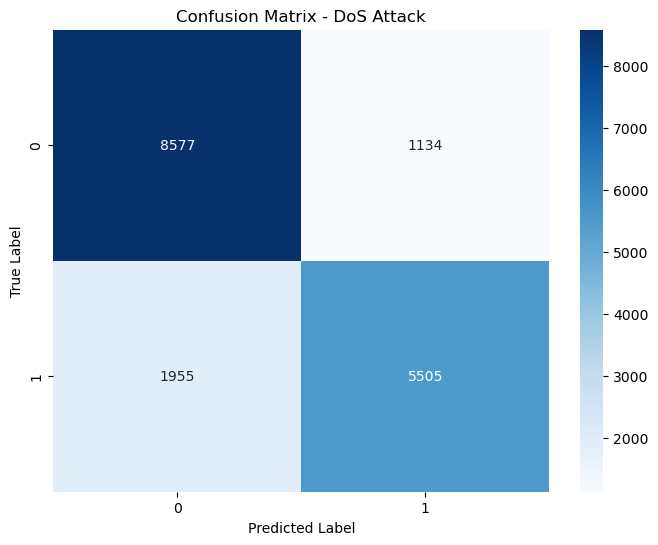

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      9711
           1       0.98      0.68      0.80      7460

    accuracy                           0.85     17171
   macro avg       0.89      0.83      0.84     17171
weighted avg       0.88      0.85      0.85     17171



In [59]:
# Predict the labels for the test data using the random tree model
Y_DoS_rfepred = clf_rfeDoS_best.predict(X_DoS_test)

# Create the confusion matrix
cm = confusion_matrix(Y_DoS_test, Y_DoS_rfepred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of DoS Prediction:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_rfepred))

### DoS Evaluation with feature selection

Confusion Matrix:
[[9281  430]
 [2385 5075]]
Accuracy of DoS Prediction with feature selection: 0.836


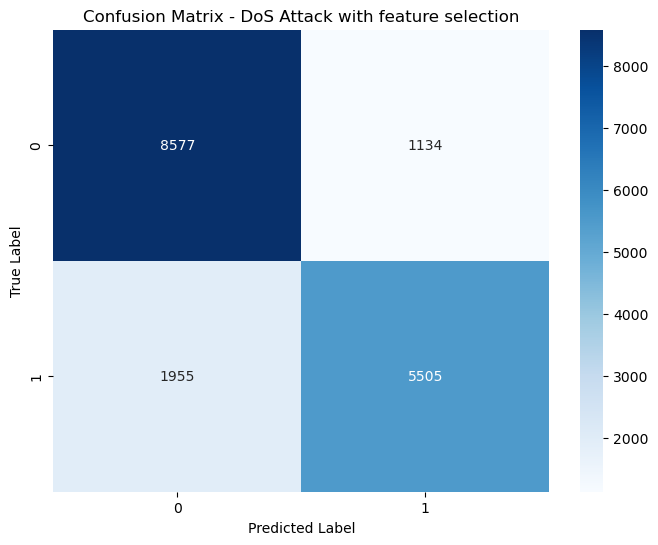

Classification Report for DoS with feature selection:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      9711
           1       0.92      0.68      0.78      7460

    accuracy                           0.84     17171
   macro avg       0.86      0.82      0.83     17171
weighted avg       0.85      0.84      0.83     17171



In [60]:
# Predict the labels for the test data using the random tree model
Y_DoS_rfepred_features = clf_rfeDoS_features_best.predict(X_newDoS_test)

# Create the confusion matrix
cm = confusion_matrix(Y_DoS_test, Y_DoS_rfepred_features)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of DoS Prediction with feature selection:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for DoS with feature selection:")
print(classification_report(Y_DoS_test, Y_DoS_rfepred_features))

### Probe prediction

Confusion Matrix:
[[9422  289]
 [ 979 1442]]
Accuracy of Probe Prediction: 0.895


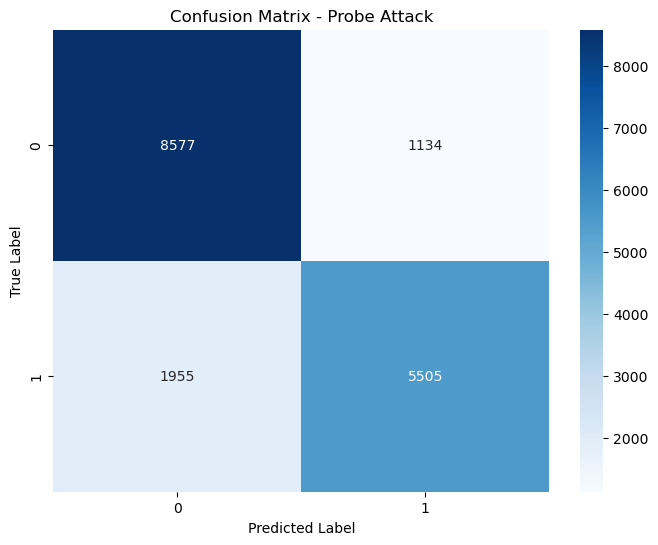

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9711
           2       0.83      0.60      0.69      2421

    accuracy                           0.90     12132
   macro avg       0.87      0.78      0.82     12132
weighted avg       0.89      0.90      0.89     12132



In [61]:
# Predict the labels for the test data
Y_probe_rfepred = clf_rfeProbe_best.predict(X_Probe_test)

# Create the confusion matrix
cm = confusion_matrix(Y_Probe_test, Y_probe_rfepred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of Probe Prediction:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Probe Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_probe_rfepred))

### Probe prediction with feature selection

Confusion Matrix:
[[9459  252]
 [1124 1297]]
Accuracy of Probe Prediction with feature selection: 0.887


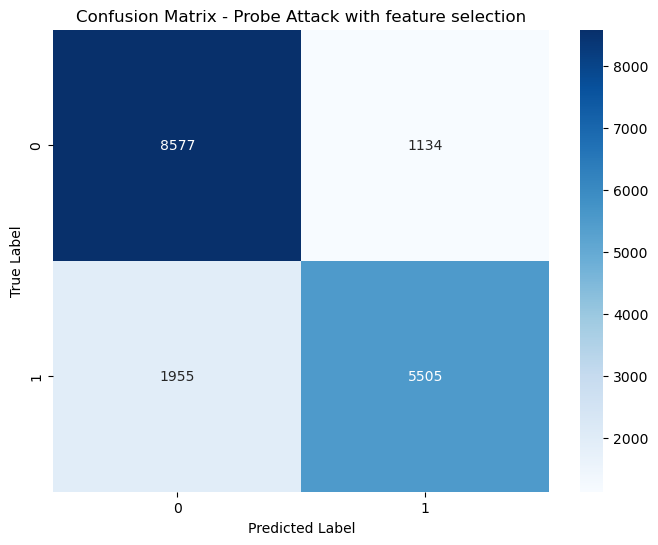

Classification Report for Probe with feature selection:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      9711
           2       0.84      0.54      0.65      2421

    accuracy                           0.89     12132
   macro avg       0.87      0.75      0.79     12132
weighted avg       0.88      0.89      0.88     12132



In [62]:
# Predict the labels for the test data using the random tree model
Y_Probe_rfepred_features = clf_rfeProbe_features_best.predict(X_newProbe_test)

# Create the confusion matrix
cm = confusion_matrix(Y_Probe_test, Y_Probe_rfepred_features)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of Probe Prediction with feature selection:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Probe Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for Probe with feature selection:")
print(classification_report(Y_Probe_test, Y_Probe_rfepred_features))

### R2L prediction

Confusion Matrix:
[[9711    0]
 [2885    0]]
Accuracy of R2L Prediction: 0.771


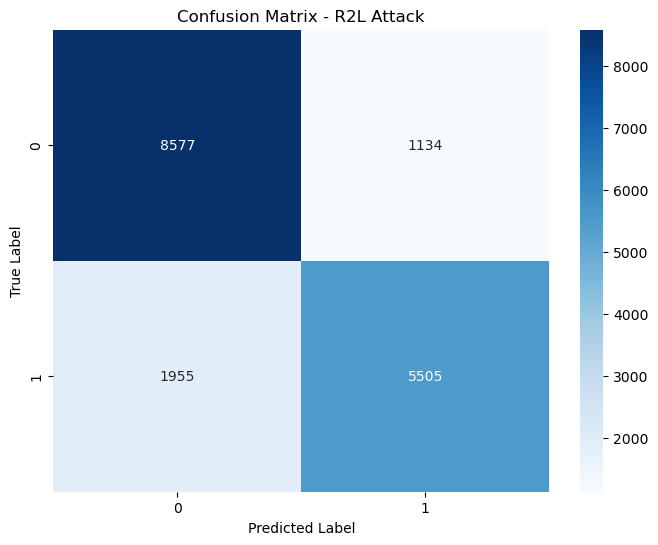

Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9711
           3       0.00      0.00      0.00      2885

    accuracy                           0.77     12596
   macro avg       0.39      0.50      0.44     12596
weighted avg       0.59      0.77      0.67     12596



/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [63]:
# Predict the labels for the test data
Y_R2L_rfepred = clf_rfeR2L_best.predict(X_R2L_test)

# Create the confusion matrix
cm = confusion_matrix(Y_R2L_test, Y_R2L_rfepred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of R2L Prediction:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_rfepred))

### R2L prediction with feature selection

Confusion Matrix:
[[9711    0]
 [2861   24]]
Accuracy of R2L Prediction with feature selection: 0.773


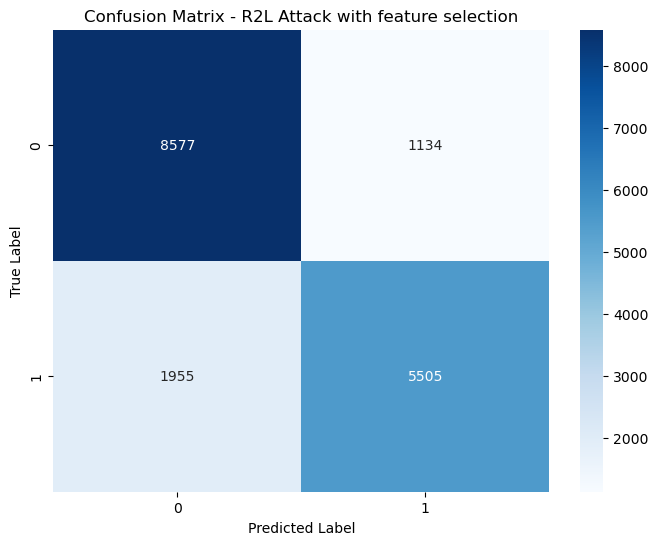

Classification Report for R2L with feature selection:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9711
           3       1.00      0.01      0.02      2885

    accuracy                           0.77     12596
   macro avg       0.89      0.50      0.44     12596
weighted avg       0.82      0.77      0.68     12596



In [64]:
# Predict the labels for the test data using the random tree model
Y_R2L_rfepred_features = clf_rfeR2L_features_best.predict(X_newR2L_test)

# Create the confusion matrix
cm = confusion_matrix(Y_R2L_test, Y_R2L_rfepred_features)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of R2L Prediction with feature selection:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for R2L with feature selection:")
print(classification_report(Y_R2L_test, Y_R2L_rfepred_features))

### U2R prediction

Confusion Matrix:
[[9711    0]
 [  67    0]]
Accuracy of U2R Prediction: 0.993


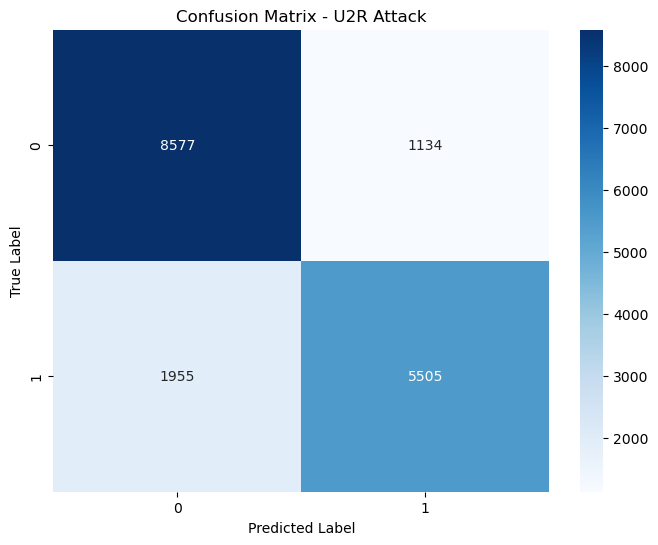

Classification Report for U2R:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.00      0.00      0.00        67

    accuracy                           0.99      9778
   macro avg       0.50      0.50      0.50      9778
weighted avg       0.99      0.99      0.99      9778



/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [65]:
# Predict the labels for the test data
Y_U2R_rfepred = clf_rfeU2R_best.predict(X_U2R_test)

# Create the confusion matrix
cm = confusion_matrix(Y_U2R_test, Y_U2R_rfepred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of U2R Prediction:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_rfepred))

### U2R prediction with feature selection

Confusion Matrix:
[[9708    3]
 [  61    6]]
Accuracy of U2R Prediction with feature selection: 0.993


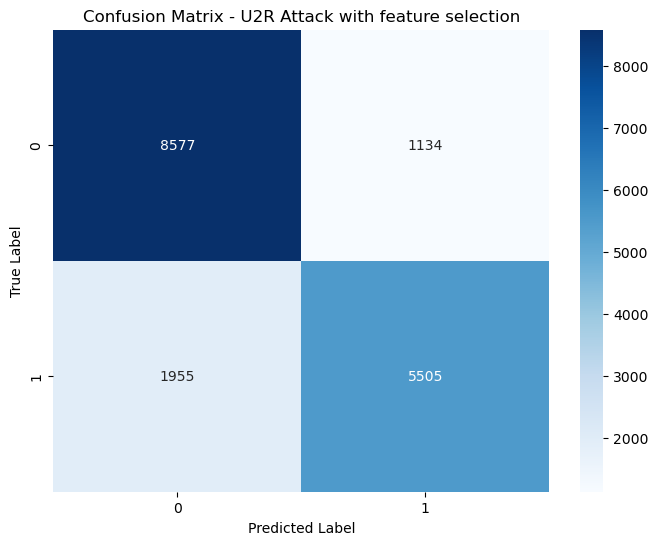

Classification Report for U2R with feature selection:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.67      0.09      0.16        67

    accuracy                           0.99      9778
   macro avg       0.83      0.54      0.58      9778
weighted avg       0.99      0.99      0.99      9778



In [66]:
# Predict the labels for the test data using the random tree model
Y_U2R_rfepred_features = clf_rfeU2R_features_best.predict(X_newU2R_test)

# Create the confusion matrix
cm = confusion_matrix(Y_U2R_test, Y_U2R_rfepred_features)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of U2R Prediction with feature selection:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for U2R with feature selection:")
print(classification_report(Y_U2R_test, Y_U2R_rfepred_features))

# KNN Code

In [67]:
# Time Taken: 101 mins
clf_knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'leaf_size': [30],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski']
}

# Create KNN classifiers for each attack type
clf_knn_DoS = KNeighborsClassifier()
clf_knn_DoS_features = KNeighborsClassifier()
clf_knn_Probe = KNeighborsClassifier()
clf_knn_Probe_features = KNeighborsClassifier()
clf_knn_R2L = KNeighborsClassifier()
clf_knn_R2L_features = KNeighborsClassifier()
clf_knn_U2R = KNeighborsClassifier()
clf_knn_U2R_features = KNeighborsClassifier()

# Fit the classifiers on the training data
clf_knn_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_knn_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
clf_knn_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_knn_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
clf_knn_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_knn_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
clf_knn_U2R.fit(X_U2R, Y_U2R.astype(int))
clf_knn_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

# Create StratifiedKFold instance for cross-validation
stratified_k_fold = StratifiedKFold(n_splits=5)

# Perform grid search cross-validation to find the best value of K for each classifier
grid_search_DoS = GridSearchCV(clf_knn_DoS, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_DoS_features = GridSearchCV(clf_knn_DoS_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe = GridSearchCV(clf_knn_Probe, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe_features = GridSearchCV(clf_knn_Probe_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L = GridSearchCV(clf_knn_R2L, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L_features = GridSearchCV(clf_knn_R2L_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R = GridSearchCV(clf_knn_U2R, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R_features = GridSearchCV(clf_knn_U2R_features, param_grid, cv=stratified_k_fold, n_jobs=-1)

# Fit the grid search on the training data
grid_search_DoS.fit(X_DoS, Y_DoS.astype(int))
grid_search_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
grid_search_Probe.fit(X_Probe, Y_Probe.astype(int))
grid_search_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
grid_search_R2L.fit(X_R2L, Y_R2L.astype(int))
grid_search_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
grid_search_U2R.fit(X_U2R, Y_U2R.astype(int))
grid_search_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

# Get the best value of K for each classifier
best_K_DoS = grid_search_DoS.best_params_['n_neighbors']
best_K_DoS_features = grid_search_DoS_features.best_params_['n_neighbors']
best_K_Probe = grid_search_Probe.best_params_['n_neighbors']
best_K_Probe_features = grid_search_Probe_features.best_params_['n_neighbors']
best_K_R2L = grid_search_R2L.best_params_['n_neighbors']
best_K_R2L_features = grid_search_R2L_features.best_params_['n_neighbors']
best_K_U2R = grid_search_U2R.best_params_['n_neighbors']
best_K_U2R_features = grid_search_U2R_features.best_params_['n_neighbors']

# Print the best parameters
print("Best parameters for DoS classifier:", grid_search_DoS.best_params_)
print("Best parameters for DoS classifier with features:", grid_search_DoS_features.best_params_)
print("Best parameters for Probe classifier:", grid_search_Probe.best_params_)
print("Best parameters for Probe classifier with features:", grid_search_Probe_features.best_params_)
print("Best parameters for R2L classifier:", grid_search_R2L.best_params_)
print("Best parameters for R2L classifier with features:", grid_search_R2L_features.best_params_)
print("Best parameters for U2R classifier:", grid_search_U2R.best_params_)
print("Best parameters for U2R classifier with features:", grid_search_U2R_features.best_params_)

# Create new KNN classifiers with the best value of K
clf_knn_DoS = KNeighborsClassifier(n_neighbors=best_K_DoS)
clf_knn_DoS_features = KNeighborsClassifier(n_neighbors=best_K_DoS_features)
clf_knn_Probe = KNeighborsClassifier(n_neighbors=best_K_Probe)
clf_knn_Probe_features = KNeighborsClassifier(n_neighbors=best_K_Probe_features)
clf_knn_R2L = KNeighborsClassifier(n_neighbors=best_K_R2L)
clf_knn_R2L_features = KNeighborsClassifier(n_neighbors=best_K_R2L_features)
clf_knn_U2R = KNeighborsClassifier(n_neighbors=best_K_U2R)
clf_knn_U2R_features = KNeighborsClassifier(n_neighbors=best_K_U2R_features)

# Fit the new classifiers on the training data
clf_knn_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_knn_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
clf_knn_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_knn_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
clf_knn_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_knn_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
clf_knn_U2R.fit(X_U2R, Y_U2R.astype(int))
clf_knn_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

Best parameters for DoS classifier: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
Best parameters for DoS classifier with features: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'}
Best parameters for Probe classifier: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
Best parameters for Probe classifier with features: {'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
Best parameters for R2L classifier: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
Best parameters for R2L classifier with features: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Best parameters for U2R classifier: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 7, 'wei

KNeighborsClassifier()

### DoS Evaluation

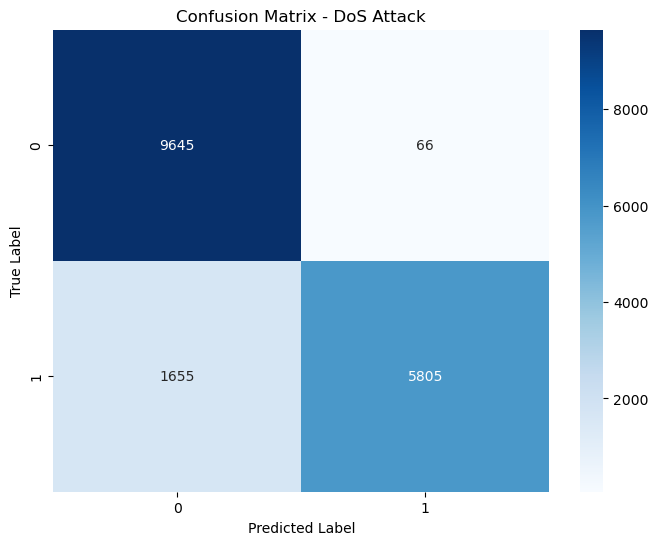

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      9711
           1       0.99      0.78      0.87      7460

    accuracy                           0.90     17171
   macro avg       0.92      0.89      0.89     17171
weighted avg       0.91      0.90      0.90     17171



In [68]:
Y_DoS_pred = clf_knn_DoS.predict(X_DoS_test)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report for Probe:")
print(classification_report(Y_DoS_test, Y_DoS_pred))

### DoS Evaluation with feature selection

Confusion Matrix for DoS with feature selection:
Predicted attacks     0     1
Actual attacks               
0                  9249   462
1                  2231  5229
Accuracy: 0.8431658028070584


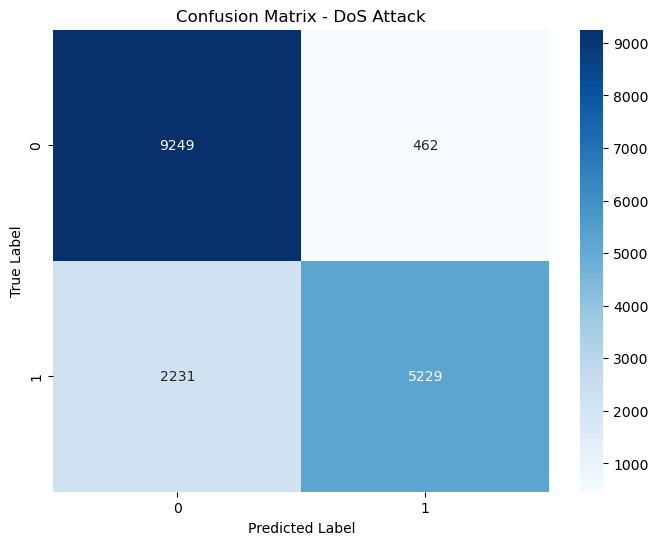

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      9711
           1       0.92      0.70      0.80      7460

    accuracy                           0.84     17171
   macro avg       0.86      0.83      0.83     17171
weighted avg       0.85      0.84      0.84     17171

AUC-ROC Score for DoS Prediction: 0.8637912135239245


In [72]:
# Make predictions on the test set
Y_DoS_pred_feature = clf_knn_DoS_features.predict(X_newDoS_test)

# Create confusion matrix
cm_DoS = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for DoS with feature selection:")
print(cm_DoS)

# Calculate accuracy
accuracy_DoS = accuracy_score(Y_DoS_test, Y_DoS_pred_feature)
print("Accuracy:", accuracy_DoS)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_pred_feature))

# Calculate the predicted probabilities for the positive class (DoS attack)
# Ensure to use the transformed test set
Y_DoS_pred_proba = clf_knn_DoS_features.predict_proba(X_newDoS_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_DoS_test, Y_DoS_pred_proba)
print("AUC-ROC Score for DoS Prediction:", auc_roc_score)

### Probe prediction

In [73]:
Y_Probe_pred = clf_knn_Probe.predict(X_Probe_test)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Calculate evaluation metrics
accuracy = accuracy_score(Y_Probe_test, Y_Probe_pred)


# Display the evaluation metrics and confusion matrix
print("Evaluation Metrics for Probe:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix for Probe:")
print(confusion_matrix)
print()

print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

Evaluation Metrics for Probe:
Accuracy: 0.8589680184635674

Confusion Matrix for Probe:
Predicted attacks     0     2
Actual attacks               
0                  9030   681
2                  1030  1391

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      9711
           2       0.67      0.57      0.62      2421

    accuracy                           0.86     12132
   macro avg       0.78      0.75      0.77     12132
weighted avg       0.85      0.86      0.85     12132



### Probe prediction with feature selection

Confusion Matrix for Probe with feature selection:
Predicted attacks     0     2
Actual attacks               
0                  9073   638
2                  1131  1290
Accuracy: 0.8541872733267392


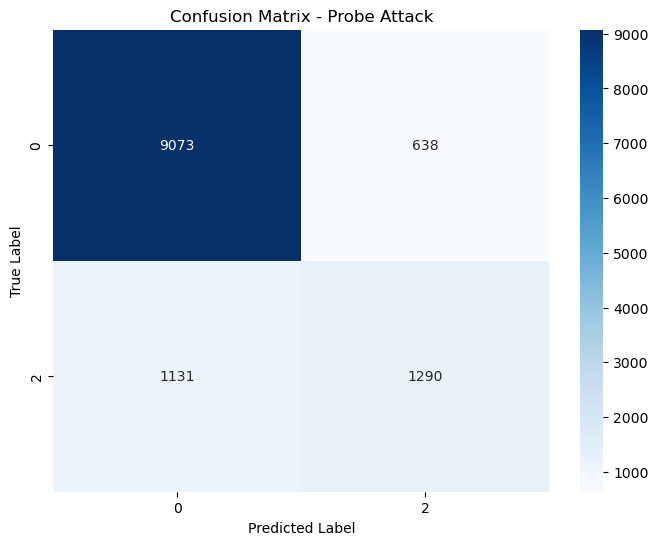

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      9711
           2       0.67      0.53      0.59      2421

    accuracy                           0.85     12132
   macro avg       0.78      0.73      0.75     12132
weighted avg       0.85      0.85      0.85     12132

AUC-ROC Score for Probe Prediction: 0.7450688380355002


In [75]:
# Make predictions on the test set
Y_Probe_pred = clf_knn_Probe_features.predict(X_newProbe_test)

# Create confusion matrix
cm_Probe= pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for Probe with feature selection:")
print(cm_Probe)

# Calculate accuracy
accuracy_Probe = accuracy_score(Y_Probe_test, Y_Probe_pred)
print("Accuracy:", accuracy_Probe)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_Probe, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Probe Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

# Calculate the predicted probabilities for the positive class (DoS attack)
# Ensure to use the transformed test set
Y_Probe_pred_proba = clf_knn_Probe_features.predict_proba(X_newProbe_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_Probe_test, Y_Probe_pred_proba)
print("AUC-ROC Score for Probe Prediction:", auc_roc_score)

### R2L prediction

In [76]:
Y_R2L_pred=clf_knn_R2L.predict(X_R2L_test)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Calculate evaluation metrics
accuracy = accuracy_score(Y_R2L_test, Y_R2L_pred)


# Display the evaluation metrics and confusion matrix
print("Evaluation Metrics for R2L:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix for R2L:")
print(confusion_matrix)
print()

print("Classification Report for Probe:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

Evaluation Metrics for R2L:
Accuracy: 0.7870752619879327

Confusion Matrix for R2L:
Predicted attacks     0    3
Actual attacks              
0                  9703    8
3                  2674  211

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      9711
           3       0.96      0.07      0.14      2885

    accuracy                           0.79     12596
   macro avg       0.87      0.54      0.51     12596
weighted avg       0.83      0.79      0.71     12596



### R2L prediction with feature selection

Confusion Matrix for R2L with feature selection:
Predicted attacks     0    3
Actual attacks              
0                  9705    6
3                  2602  283
Accuracy: 0.7929501429025088


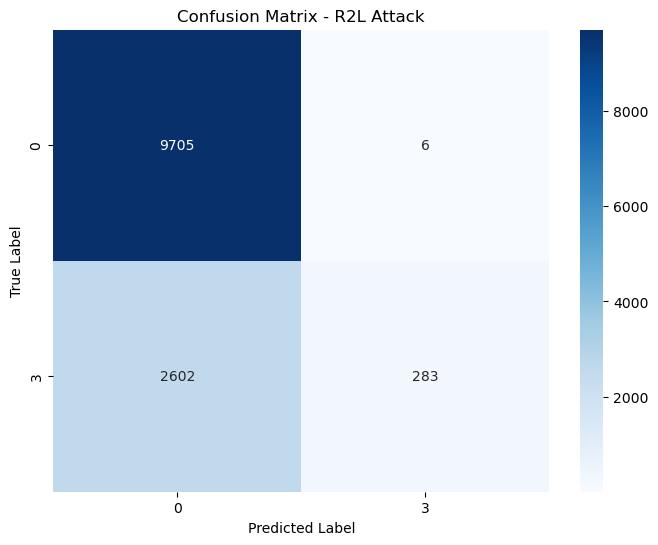

Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9711
           3       0.98      0.10      0.18      2885

    accuracy                           0.79     12596
   macro avg       0.88      0.55      0.53     12596
weighted avg       0.83      0.79      0.72     12596

AUC-ROC Score for R2L Prediction: 0.5812365937107538


In [82]:
# Make predictions on the test set
Y_R2L_pred = clf_knn_R2L_features.predict(X_newR2L_test)

# Create confusion matrix
cm_R2L = pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for R2L with feature selection:")
print(cm_R2L)

# Calculate accuracy
accuracy_R2L = accuracy_score(Y_R2L_test, Y_R2L_pred)
print("Accuracy:", accuracy_R2L)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_R2L, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

# Calculate the predicted probabilities for the positive class (DoS attack)
# Ensure to use the transformed test set
Y_R2L_pred_proba = clf_knn_R2L_features.predict_proba(X_newR2L_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_R2L_test, Y_R2L_pred_proba)
print("AUC-ROC Score for R2L Prediction:", auc_roc_score)

### U2R prediction

In [79]:
Y_U2R_pred=clf_knn_U2R.predict(X_U2R_test)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

# Calculate evaluation metrics
accuracy = accuracy_score(Y_U2R_test, Y_U2R_pred)

# Display the evaluation metrics and confusion matrix
print("Evaluation Metrics for U2R:")
print("Accuracy:", accuracy)
print("\nConfusion Matrix for U2R:")
print(confusion_matrix)
print()

print("Classification Report for Probe:")
print(classification_report(Y_U2R_test, Y_U2R_pred))

Evaluation Metrics for U2R:
Accuracy: 0.9947842094497852

Confusion Matrix for U2R:
Predicted attacks     0   4
Actual attacks             
0                  9706   5
4                    46  21

Classification Report for Probe:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           4       0.81      0.31      0.45        67

    accuracy                           0.99      9778
   macro avg       0.90      0.66      0.72      9778
weighted avg       0.99      0.99      0.99      9778



### U2R prediction with feature selection

Confusion Matrix for U2R with feature selection:
Predicted attacks     0   4
Actual attacks             
0                  9707   4
4                    49  18
Accuracy: 0.9945796686438945


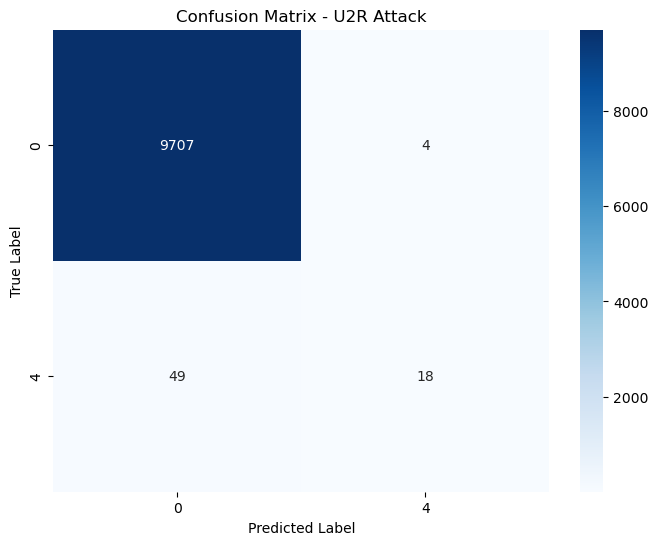

Classification Report for U2R:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.82      0.27      0.40        67

    accuracy                           0.99      9778
   macro avg       0.91      0.63      0.70      9778
weighted avg       0.99      0.99      0.99      9778

AUC-ROC Score for U2R Prediction: 0.7459120830816568


In [83]:
# Make predictions on the test set
Y_U2R_pred = clf_knn_U2R_features.predict(X_newU2R_test)

# Create confusion matrix
cm_U2R = pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for U2R with feature selection:")
print(cm_U2R)

# Calculate accuracy
accuracy_U2R = accuracy_score(Y_U2R_test, Y_U2R_pred)
print("Accuracy:", accuracy_U2R)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_U2R, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_pred))

# Calculate the predicted probabilities for the positive class (U2R attack)
# Ensure to use the transformed test set
Y_U2R_pred_proba = clf_knn_U2R_features.predict_proba(X_newU2R_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(Y_U2R_test, Y_U2R_pred_proba)
print("AUC-ROC Score for U2R Prediction:", auc_roc_score)

## SVM Code and evaluation

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# time taken: 32 mins

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'gamma': ['scale']
}

# Create new SVC classifiers for each attack type
clf_SVM_DoS = SVC(random_state=0)
clf_SVM_DoS_features = SVC(random_state=0)
clf_SVM_Probe = SVC(random_state=0)
clf_SVM_Probe_features = SVC(random_state=0)
clf_SVM_R2L = SVC(random_state=0)
clf_SVM_R2L_features = SVC(random_state=0)
clf_SVM_U2R = SVC(random_state=0)
clf_SVM_U2R_features = SVC(random_state=0)

stratified_k_fold = StratifiedKFold(n_splits=5)

# Perform grid search cross-validation to find the best hyperparameters for each classifier
grid_search_DoS = GridSearchCV(clf_SVM_DoS, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_DoS_features = GridSearchCV(clf_SVM_DoS_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe = GridSearchCV(clf_SVM_Probe, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_Probe_features = GridSearchCV(clf_SVM_Probe_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L = GridSearchCV(clf_SVM_R2L, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_R2L_features = GridSearchCV(clf_SVM_R2L_features, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R = GridSearchCV(clf_SVM_U2R, param_grid, cv=stratified_k_fold, n_jobs=-1)
grid_search_U2R_features = GridSearchCV(clf_SVM_U2R_features, param_grid, cv=stratified_k_fold, n_jobs=-1)

# Fit the classifiers on the training data
grid_search_DoS.fit(X_DoS, Y_DoS.astype(int))
grid_search_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
grid_search_Probe.fit(X_Probe, Y_Probe.astype(int))
grid_search_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
grid_search_R2L.fit(X_R2L, Y_R2L.astype(int))
grid_search_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
grid_search_U2R.fit(X_U2R, Y_U2R.astype(int))
grid_search_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

# Get the best hyperparameters for each classifier
best_params_DoS = grid_search_DoS.best_params_
best_params_DoS_features = grid_search_DoS_features.best_params_
best_params_Probe = grid_search_Probe.best_params_
best_params_Probe_features = grid_search_Probe_features.best_params_
best_params_R2L = grid_search_R2L.best_params_
best_params_R2L_features = grid_search_R2L_features.best_params_
best_params_U2R = grid_search_U2R.best_params_
best_params_U2R_features = grid_search_U2R_features.best_params_

# Print the best parameters
print("Best parameters for DoS classifier:", grid_search_DoS.best_params_)
print("Best parameters for DoS classifier with features:", grid_search_DoS_features.best_params_)
print("Best parameters for Probe classifier:", grid_search_Probe.best_params_)
print("Best parameters for Probe classifier with features:", grid_search_Probe_features.best_params_)
print("Best parameters for R2L classifier:", grid_search_R2L.best_params_)
print("Best parameters for R2L classifier with features:", grid_search_R2L_features.best_params_)
print("Best parameters for U2R classifier:", grid_search_U2R.best_params_)
print("Best parameters for U2R classifier with features:", grid_search_U2R_features.best_params_)

# Create new SVC classifiers with the best hyperparameters
clf_SVM_DoS = SVC(**best_params_DoS, random_state=0)
clf_SVM_DoS_features = SVC(**best_params_DoS_features, random_state=0)
clf_SVM_Probe = SVC(**best_params_Probe, random_state=0)
clf_SVM_Probe_features = SVC(**best_params_Probe_features, random_state=0)
clf_SVM_R2L = SVC(**best_params_R2L, random_state=0)
clf_SVM_R2L_features = SVC(**best_params_R2L_features, random_state=0)
clf_SVM_U2R = SVC(**best_params_U2R, random_state=0)
clf_SVM_U2R_features = SVC(**best_params_U2R_features, random_state=0)

# Fit the new classifiers on the training data
clf_SVM_DoS.fit(X_DoS, Y_DoS.astype(int))
clf_SVM_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
clf_SVM_Probe.fit(X_Probe, Y_Probe.astype(int))
clf_SVM_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
clf_SVM_R2L.fit(X_R2L, Y_R2L.astype(int))
clf_SVM_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
clf_SVM_U2R.fit(X_U2R, Y_U2R.astype(int))
clf_SVM_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

Best parameters for DoS classifier: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for DoS classifier with features: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for Probe classifier: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for Probe classifier with features: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for R2L classifier: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for R2L classifier with features: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for U2R classifier: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for U2R classifier with features: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


SVC(C=0.1, kernel='linear', random_state=0)

### DoS Evaluation

In [86]:
Y_DoS_pred=clf_SVM_DoS.predict(X_DoS_test)

# Create confusion matrix
confusion_matrix = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for DoS:")
print(confusion_matrix)
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_pred))

Confusion Matrix for DoS:
Predicted attacks     0     1
Actual attacks               
0                  9518   193
1                  1186  6274
Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      9711
           1       0.97      0.84      0.90      7460

    accuracy                           0.92     17171
   macro avg       0.93      0.91      0.92     17171
weighted avg       0.92      0.92      0.92     17171



### DoS Evaluation with feature selection

Confusion Matrix for DoS with feature selection:
Predicted attacks     0     1
Actual attacks               
0                  9174   537
1                  1832  5628
Accuracy: 0.8620348261603867


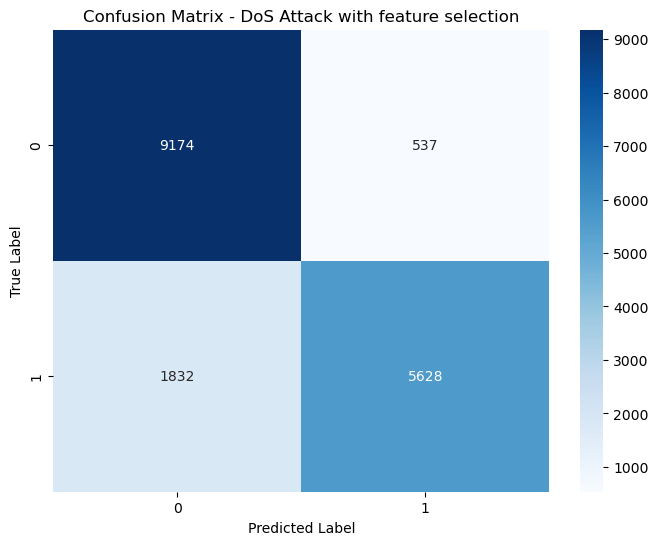

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.83      0.94      0.89      9711
           1       0.91      0.75      0.83      7460

    accuracy                           0.86     17171
   macro avg       0.87      0.85      0.86     17171
weighted avg       0.87      0.86      0.86     17171



In [89]:
# Make predictions on the test set
Y_DoS_pred = clf_SVM_DoS_features.predict(X_newDoS_test)

# Create confusion matrix
cm_DoS = pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print("Confusion Matrix for DoS with feature selection:")
print(cm_DoS)

# Calculate accuracy
accuracy_DoS = accuracy_score(Y_DoS_test, Y_DoS_pred)
print("Accuracy:", accuracy_DoS)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_pred))

### Probe prediction

In [90]:
Y_Probe_pred=clf_SVM_Probe.predict(X_Probe_test)
# Create confusion matrix

confusion_matrix = pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for Probe:")
print(confusion_matrix)
print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

Confusion Matrix for Probe:
Predicted attacks     0     2
Actual attacks               
0                  8970   741
2                   645  1776
Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9711
           2       0.71      0.73      0.72      2421

    accuracy                           0.89     12132
   macro avg       0.82      0.83      0.82     12132
weighted avg       0.89      0.89      0.89     12132



### Probe prediction with feature selection

Confusion Matrix for Probe with feature selection:
Predicted attacks     0     2
Actual attacks               
0                  9283   428
2                  1157  1264
Accuracy: 0.8693537751401252


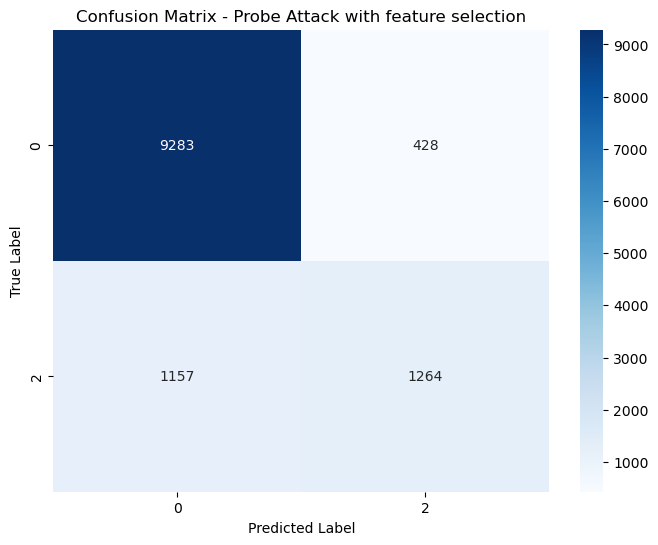

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      9711
           2       0.75      0.52      0.61      2421

    accuracy                           0.87     12132
   macro avg       0.82      0.74      0.77     12132
weighted avg       0.86      0.87      0.86     12132



In [92]:
# Make predictions on the test set
Y_Probe_pred = clf_SVM_Probe_features.predict(X_newProbe_test)

# Create confusion matrix
cm_Probe = pd.crosstab(Y_Probe_test, Y_Probe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print("Confusion Matrix for Probe with feature selection:")
print(cm_Probe)

# Calculate accuracy
accuracy_Probe = accuracy_score(Y_Probe_test, Y_Probe_pred)
print("Accuracy:", accuracy_Probe)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_Probe, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Probe Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_Probe_pred))

### R2L prediction

In [93]:
Y_R2L_pred=clf_SVM_R2L.predict(X_R2L_test)
# Create confusion matrix
confusion_matrix = pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for R2L:")
print(confusion_matrix)
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

Confusion Matrix for R2L:
Predicted attacks     0    3
Actual attacks              
0                  9678   33
3                  2733  152
Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      9711
           3       0.82      0.05      0.10      2885

    accuracy                           0.78     12596
   macro avg       0.80      0.52      0.49     12596
weighted avg       0.79      0.78      0.70     12596



### R2L prediction with feature selection

Confusion Matrix for R2L with feature selection:
Predicted attacks     0    3
Actual attacks              
0                  9686   25
3                  2508  377
Accuracy: 0.7989044140997142


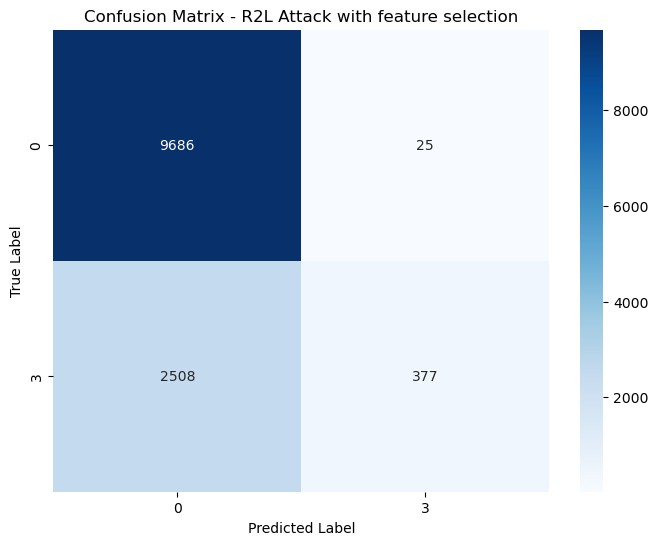

Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9711
           3       0.94      0.13      0.23      2885

    accuracy                           0.80     12596
   macro avg       0.87      0.56      0.56     12596
weighted avg       0.83      0.80      0.73     12596



In [94]:
# Make predictions on the test set
Y_R2L_pred = clf_SVM_R2L_features.predict(X_newR2L_test)

# Create confusion matrix
cm_R2L = pd.crosstab(Y_R2L_test, Y_R2L_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print("Confusion Matrix for R2L with feature selection:")
print(cm_R2L)

# Calculate accuracy
accuracy_R2L = accuracy_score(Y_R2L_test, Y_R2L_pred)
print("Accuracy:", accuracy_R2L)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_R2L, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_pred))

### U2R prediction

In [95]:
Y_U2R_pred=clf_SVM_U2R.predict(X_U2R_test)
# Create confusion matrix
confusion_matrix = pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

print("Confusion Matrix for U2R:")
print(confusion_matrix)
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_pred))

Confusion Matrix for U2R:
Predicted attacks     0   4
Actual attacks             
0                  9704   7
4                    43  24
Classification Report for U2R:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           4       0.77      0.36      0.49        67

    accuracy                           0.99      9778
   macro avg       0.88      0.68      0.74      9778
weighted avg       0.99      0.99      0.99      9778



### U2R prediction with feature selection

Confusion Matrix for U2R with feature selection:
Predicted attacks     0
Actual attacks         
0                  9711
4                    67
Accuracy: 0.993147883002659


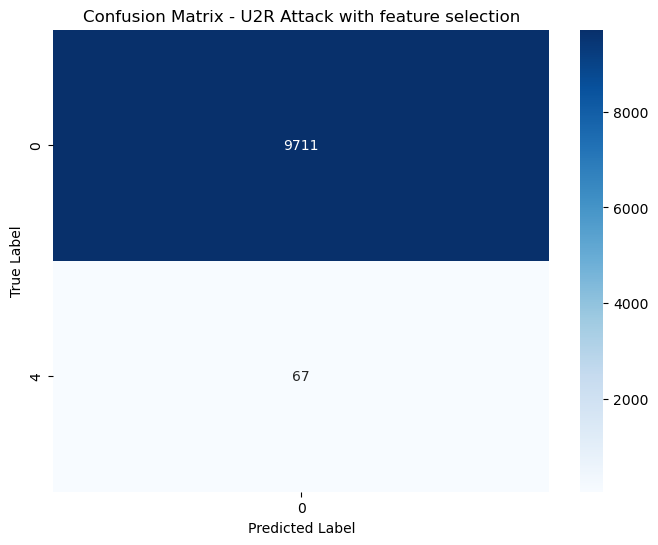

Classification Report for U2R:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.00      0.00      0.00        67

    accuracy                           0.99      9778
   macro avg       0.50      0.50      0.50      9778
weighted avg       0.99      0.99      0.99      9778



/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [97]:
# Make predictions on the test set
Y_U2R_pred = clf_SVM_U2R_features.predict(X_newU2R_test)

# Create confusion matrix
cm_U2R = pd.crosstab(Y_U2R_test, Y_U2R_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])
print("Confusion Matrix for U2R with feature selection:")
print(cm_U2R)

# Calculate accuracy
accuracy_U2R = accuracy_score(Y_U2R_test, Y_U2R_pred)
print("Accuracy:", accuracy_U2R)

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_U2R, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the model
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_pred))